In [140]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential
from keras import backend as K


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

## Lets see the cat!

In [194]:
cat_img = cv2.imread('cat.png')

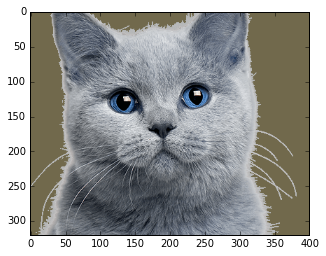

In [195]:
plt.imshow(cat_img)

In [246]:
# what does the image look like?
print cat_img.shape, cat_img.shape[0], cat_img.shape[1], cat_img.shape[2]
print cat_img

(320L, 400L, 3L) 320 400 3
[[[113 105  76]
  [113 105  76]
  [113 105  76]
  ..., 
  [113 105  76]
  [113 105  76]
  [113 105  76]]

 [[113 105  76]
  [113 105  76]
  [113 105  76]
  ..., 
  [113 105  76]
  [113 105  76]
  [113 105  76]]

 [[113 105  76]
  [113 105  76]
  [113 105  76]
  ..., 
  [113 105  76]
  [113 105  76]
  [113 105  76]]

 ..., 
 [[113 105  76]
  [113 105  76]
  [113 105  76]
  ..., 
  [113 105  76]
  [113 105  76]
  [113 105  76]]

 [[113 105  76]
  [113 105  76]
  [113 105  76]
  ..., 
  [113 105  76]
  [113 105  76]
  [113 105  76]]

 [[113 105  76]
  [113 105  76]
  [113 105  76]
  ..., 
  [113 105  76]
  [113 105  76]
  [113 105  76]]]


In [250]:
def adjust_shape_to_model(img) :
    if K.image_data_format() == 'channels_first':
        img = img.reshape(img.shape[2], img.shape[0], img.shape[1])
    print "adjust_shape_to_model ->", K.image_data_format(), img.shape
    return img

In [251]:
def adjust_shape_to_show(img) :
    if K.image_data_format() == 'channels_first':
        img = img.reshape(img.shape[1], img.shape[2], img.shape[0])
    print "adjust_shape_to_show ->", K.image_data_format(), img.shape
    return img

## Lets create a model with 1 Convolutional layer

In [270]:
cat = adjust_shape_to_model(cat_img)
model = Sequential()
model.add(Convolution2D(3, (3, 3), input_shape=cat.shape, kernel_initializer="glorot_uniform"))

adjust_shape_to_model -> channels_first (3L, 320L, 400L)


In [271]:
# Keras expects batches of images, so we have to add a dimension to trick it into being nice
cat_batch = np.expand_dims(cat, axis=0)
cat_batch.shape
conv_cat = model.predict(cat_batch, verbose=1)
print conv_cat

1/1 [==============================] - 0s
[[[[-224.5561676  -236.99635315 -248.24224854 ..., -249.21525574
    -274.91046143 -253.19171143]
   [-270.03536987 -237.98616028 -278.27264404 ..., -282.80999756
    -270.61688232 -291.38803101]
   [-295.57592773 -288.74182129 -278.44970703 ..., -249.85592651
    -279.10864258 -271.12084961]
   ..., 
   [-311.93017578 -345.44625854 -318.51306152 ..., -273.65008545
    -302.75787354 -288.66671753]
   [-295.61117554 -269.73306274 -321.3894043  ..., -264.6104126
    -257.00228882 -299.89782715]
   [-300.19137573 -275.63589478 -275.50411987 ..., -345.34893799
    -316.21432495 -297.25836182]]

  [[ -85.15570831  -37.20800018  -48.97787857 ...,   -5.64545679
      -1.45546198  -36.76659393]
   [ -17.68507767   16.23553848   44.66156387 ...,   20.26852036
      15.4803524    -8.61058807]
   [  10.74627304   39.2095871    38.1394043  ...,  -36.90758514
     -40.01726532  -62.07297134]
   ..., 
   [  18.99709702   46.86131287   61.94655228 ...,  -58.9

cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_batch.shape (1L, 3L, 320L, 400L)
1/1 [==============================] - 0s
conv_cat.shape (1L, 3L, 318L, 398L)
adjust_shape_to_show -> channels_first (318L, 398L, 3L)
conv_cat_show.shape (318L, 398L, 3L)


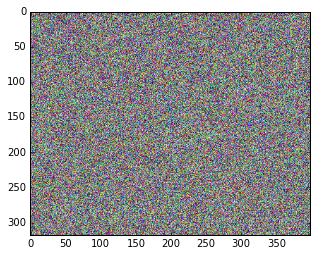

In [272]:
# here we get rid of that added dimension and plot the image
def visualize_cat(model, cat_img):
    print "cat_img.shape", cat_img.shape
    cat = adjust_shape_to_model(cat_img)
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    cat_batch = np.expand_dims(cat,axis=0)
    print "cat_batch.shape", cat_batch.shape
    conv_cat = model.predict(cat_batch, verbose=1)
    print "conv_cat.shape", conv_cat.shape
    conv_cat = np.squeeze(conv_cat, axis=0)
    conv_cat_show = adjust_shape_to_show(conv_cat)
    print "conv_cat_show.shape", conv_cat_show.shape
    plt.imshow(conv_cat_show)

visualize_cat(model, cat_img)

## 10x10 Kernel ConvCat

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_batch.shape (1L, 3L, 320L, 400L)
conv_cat.shape (1L, 3L, 311L, 391L)
adjust_shape_to_show -> channels_first (311L, 391L, 3L)
conv_cat_show.shape (311L, 391L, 3L)


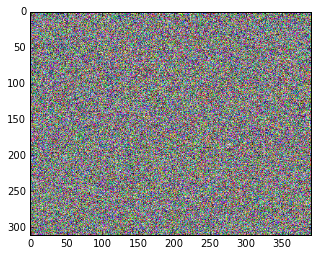

In [214]:
cat = adjust_shape_to_model(cat_img)
model = Sequential()
model.add(Convolution2D(3, (10, 10), input_shape=cat.shape))
visualize_cat(model, cat_img)

## Cat with 1 filter

In [228]:
# Note: matplot lib is pretty inconsistent with how it plots these weird cat arrays.
# Try running them a couple of times if the output doesn't quite match the blog post results.
def nice_cat_printer(model, cat_img):
    print "cat_img.shape", cat_img.shape
    cat = adjust_shape_to_model(cat_img)
    '''prints the cat as a 2d array'''
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)

    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print "conv_cat2.shape", conv_cat2.shape
    conv_cat2_show = adjust_shape_to_show(conv_cat2)
    conv_cat2_show = conv_cat2_show.reshape(conv_cat2_show.shape[:2])

    print "conv_cat2_show.shape", conv_cat2_show.shape
    plt.imshow(conv_cat2_show)

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
conv_cat2.shape (1L, 318L, 398L)
adjust_shape_to_show -> channels_first (318L, 398L, 1L)
conv_cat2_show.shape (318L, 398L)


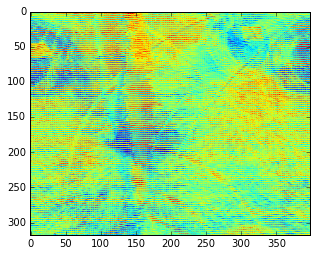

In [229]:
cat = adjust_shape_to_model(cat_img)
model = Sequential()
model.add(Convolution2D(1, (3, 3), input_shape=cat.shape))
# Keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_cat_printer(model, cat_img)

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
conv_cat2.shape (1L, 306L, 386L)
adjust_shape_to_show -> channels_first (306L, 386L, 1L)
conv_cat2_show.shape (306L, 386L)


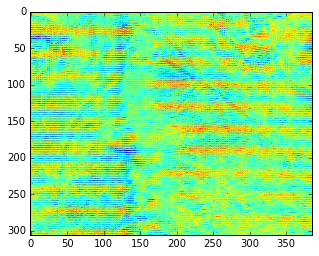

In [230]:
# 15x15 kernel size
cat = adjust_shape_to_model(cat_img)
model = Sequential()
model.add(Convolution2D(1, (15, 15), input_shape=cat.shape))
nice_cat_printer(model, cat_img)

## Lets add a relu activation

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
conv_cat2.shape (1L, 318L, 398L)
adjust_shape_to_show -> channels_first (318L, 398L, 1L)
conv_cat2_show.shape (318L, 398L)


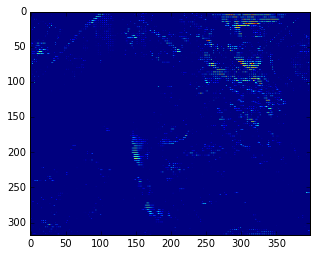

In [231]:
cat = adjust_shape_to_model(cat_img)
model = Sequential()
model.add(Convolution2D(1, (3, 3), input_shape=cat.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

nice_cat_printer(model, cat_img)

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_batch.shape (1L, 3L, 320L, 400L)
conv_cat.shape (1L, 3L, 318L, 398L)
adjust_shape_to_show -> channels_first (318L, 398L, 3L)
conv_cat_show.shape (318L, 398L, 3L)


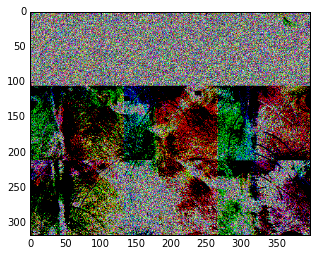

In [232]:
cat = adjust_shape_to_model(cat_img)
model = Sequential()
model.add(Convolution2D(3, (3, 3), input_shape=cat.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

visualize_cat(model, cat_img)

## Max Pooling

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
conv_cat2.shape (1L, 63L, 79L)
adjust_shape_to_show -> channels_first (63L, 79L, 1L)
conv_cat2_show.shape (63L, 79L)


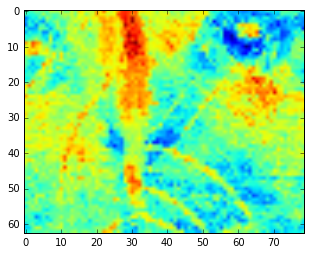

In [233]:
cat = adjust_shape_to_model(cat_img)
model = Sequential()
model.add(Convolution2D(1, (3, 3), input_shape=cat.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

nice_cat_printer(model, cat_img)

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_batch.shape (1L, 3L, 320L, 400L)
conv_cat.shape (1L, 3L, 63L, 79L)
adjust_shape_to_show -> channels_first (63L, 79L, 3L)
conv_cat_show.shape (63L, 79L, 3L)


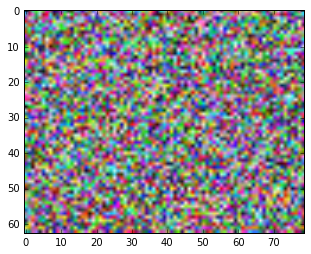

In [234]:
cat = adjust_shape_to_model(cat_img)
model = Sequential()
model.add(Convolution2D(3, (3, 3), input_shape=cat.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

# nice_cat_printer(model, cat)
visualize_cat(model, cat_img)

## Activation then pooling

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
conv_cat2.shape (1L, 63L, 79L)
adjust_shape_to_show -> channels_first (63L, 79L, 1L)
conv_cat2_show.shape (63L, 79L)


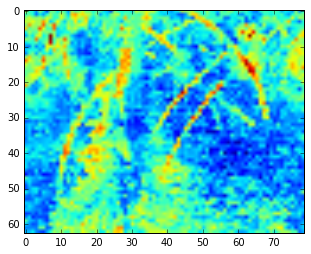

In [235]:
cat = adjust_shape_to_model(cat_img)
model = Sequential()
model.add(Convolution2D(1, (3, 3), input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

nice_cat_printer(model, cat_img)

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_batch.shape (1L, 3L, 320L, 400L)
conv_cat.shape (1L, 3L, 63L, 79L)
adjust_shape_to_show -> channels_first (63L, 79L, 3L)
conv_cat_show.shape (63L, 79L, 3L)


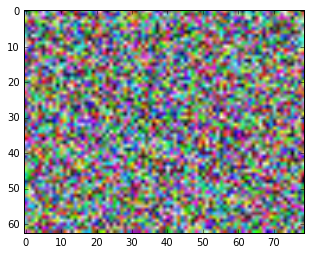

In [236]:
cat = adjust_shape_to_model(cat_img)
model = Sequential()
model.add(Convolution2D(3, (3, 3), input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_cat(model, cat_img)

## Cat after the convolutional and pooling stages of LeNet

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
conv_cat2.shape (1L, 34L, 43L)
adjust_shape_to_show -> channels_first (34L, 43L, 1L)
conv_cat2_show.shape (34L, 43L)


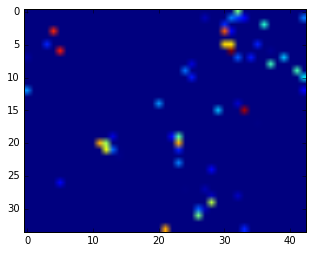

In [237]:
cat = adjust_shape_to_model(cat_img)
# 1 filter in each conv layer for pretty printing
model = Sequential()
model.add(Convolution2D(1, (3, 3), input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1, (3, 3), input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

nice_cat_printer(model, cat_img)

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
conv_cat2.shape (1L, 52L, 65L)
adjust_shape_to_show -> channels_first (52L, 65L, 1L)
conv_cat2_show.shape (52L, 65L)


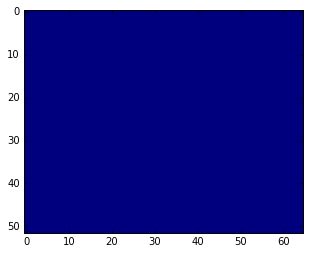

In [238]:
cat = adjust_shape_to_model(cat_img)
# 3 filters in conv1, then 1 filter for pretty printing
model = Sequential()
model.add(Convolution2D(3, (3, 3), input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1, (3, 3), input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

nice_cat_printer(model, cat_img)

adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_img.shape (320L, 400L, 3L)
adjust_shape_to_model -> channels_first (3L, 320L, 400L)
cat_batch.shape (1L, 3L, 320L, 400L)
conv_cat.shape (1L, 3L, 52L, 65L)
adjust_shape_to_show -> channels_first (52L, 65L, 3L)
conv_cat_show.shape (52L, 65L, 3L)


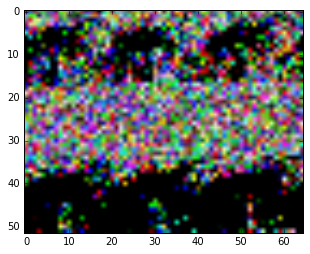

In [239]:
cat = adjust_shape_to_model(cat_img)
# 3 filters in both conv layers
model = Sequential()
model.add(Convolution2D(3, (3, 3), input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(3, (3, 3), input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

visualize_cat(model, cat_img)